Activity 6: Working with the Adult Income Dataset (UCI)

1. Load the necessary libraries. 
2. Read the adult income dataset from the following URL: https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06/. 
3. Create a script that will read a text file line by line. 
4. Add a name of Income for the response variable to the dataset. 
5. Find the missing values. 
6. Create a DataFrame with only age, education, and occupation by using subsetting. 
7. Plot a histogram of age with a bin size of 20. 
8. Create a function to strip the whitespace characters. 
9. Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column. 
10. Find the number of people who are aged between 30 and 50. 
11. Group the records based on age and education to find how the mean age is distributed. 
12. Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile. 
13. Use subset and groupby to find outliers. 
14. Plot the values on a bar chart. 
15. Merge the data using common keys.

In [1]:
# 1. Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 2. Read the adult income dataset
adult_income_data = "adult_income_data.csv"
adult_income_data=pd.read_csv(file)
adult_income_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [15]:
# 3. Create a script that will read a text file line by line.
colNames = []
with open('adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        colName=line.split(":")[0]
        colNames.append(colName)
colNames

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [16]:
# 4. Add a name of Income for the response variable to the dataset.
colNames.append('Income')
# Reread the file with new columns names
adult_income_data=pd.read_csv(file,names=colNames)
adult_income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [17]:
# 5. Find the missing values.
adult_income_data.isnull().sum()
# There are no missing values in the dataset

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [19]:
# 6. Create a DataFrame with only age, education, and occupation by using subsetting. 
columns = ['age','education','occupation']
newDataFrame = adult_income_data[columns]
newDataFrame.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


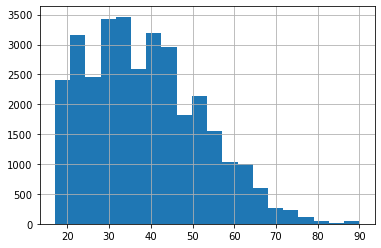

In [20]:
# 7. Plot a histogram of age with a bin size of 20.
newDataFrame['age'].hist(bins=20)

In [27]:
# 8. Create a function to strip the whitespace characters. 
def stripWhiteSpace(text):
    return(text.strip())
#TEST 
text = "  masters degree  "
text = stripWhiteSpace(text)
print(text)

masters degree


In [33]:
# 9. Use the apply method to apply this function to all the columns with string values, create a new column, 
# copy the values from this new column to the old column, and drop the new column. 
newDataFrame['tmpEducation'] = newDataFrame['education'].apply(stripWhiteSpace)
newDataFrame['education'] = newDataFrame['tmpEducation'] 
# Removes column and inplace
newDataFrame.drop(labels=['tmpEducation'],axis=1,inplace=True)

newDataFrame['tmpOccupation'] = newDataFrame['occupation'].apply(stripWhiteSpace)
newDataFrame['occupation'] = newDataFrame['tmpOccupation'] 
# Removes column and inplace
newDataFrame.drop(labels=['tmpOccupation'],axis=1,inplace=True)

newDataFrame

c:\users\safar\documents\github\safarie1103\bellevue university\courses\dsc540\week3and4\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\safar\documents\github\safarie1103\bellevue university\courses\dsc540\week3and4\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\safar\documents\git

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


In [35]:
# 10. Find the number of people who are aged between 30 and 50. 
AgeBetween30and50 = newDataFrame[(newDataFrame.age >= 30) & (newDataFrame.age <= 50) ]
AgeBetween30and50

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
...,...,...,...
32550,43,Some-college,Craft-repair
32551,32,10th,Handlers-cleaners
32552,43,Assoc-voc,Sales
32553,32,Masters,Tech-support


In [44]:
# 11. Group the records based on age and education to find how the mean age is distributed.
# NOTE: age is numeric, so I grouped by sex
adult_income_data[['sex','age','education','capital-gain','capital-loss','hours-per-week']].groupby(['sex','education']).mean()

age  capital-gain  capital-loss  hours-per-week
sex     education                                                           
 Female  10th          35.447458    174.901695     69.132203       32.111864
         11th          30.546296    128.108796     21.578704       29.821759
         12th          29.756944    174.729167     11.951389       31.791667
         1st-4th       48.521739     44.826087     34.826087       31.978261
         5th-6th       44.369048     53.833333     53.190476       36.047619
         7th-8th       49.693750     94.318750     54.775000       36.200000
         9th           42.131944    780.937500     16.277778       33.916667
         Assoc-acdm    36.361045    715.724466     68.472684       37.358670
         Assoc-voc     37.872000    455.078000     57.258000       37.830000
         Bachelors     35.635578   1051.970970     75.046943       39.329216
         Doctorate     45.325581   3346.779070    309.511628       47.302326
         HS-grad       38.678171    385.584661     53.585251       36.577286
         Masters       43.074627   1508.660448    140.595149       41.113806
         Preschool     41.750000    281.750000      0.000000       31.875000
         Prof-school   40.195652   3257.413043    157.413043       44.793478
         Some-college  33.740556    326.562010     47.529223       34.574840
 Male    10th          38.346395    510.771160     51.164577       39.336991
         11th          33.407806    265.675639     66.650067       36.312248
         12th          33.117647    338.577855     42.494810       37.768166
         1st-4th       45.245902    156.434426     53.418033       40.622951
         5th-6th       42.385542    217.240964     73.333333       39.859438
         7th-8th       48.034979    279.905350     69.255144       40.409465
         9th           40.643243    171.294595     33.948649       39.651351
         Assoc-acdm    38.046440    591.309598    109.676471       42.554180
         Assoc-voc     38.939909    862.428571     81.539683       43.753968
         Bachelors     40.321734   2061.521146    137.115899       44.037473
         Doctorate     48.327217   5144.486239    250.571865       46.886850
         HS-grad       39.115736    667.957531     78.514414       42.481367
         Masters       44.490312   3038.462511    178.516428       45.065712
         Preschool     43.228571   1180.285714     96.885714       38.828571
         Prof-school   45.611570  11774.838843    245.229339       47.925620
         Some-college  37.017391    769.162542     86.719955       41.528428

In [55]:
# 12. Group by occupation and show the summary statistics of age. 
# Find which profession has the oldest workers on average and which profession has its largest share of the workforce 
# above the 75th percentile. 
stats = adult_income_data.groupby(['occupation']).describe()['age']
# Ignoring '?', there are many occupations with the oldes worker at age of 90 years old thiscould bean outlier.
# and largest share of work force above 75% is farming-fishing at 52%.
stats

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [53]:
# 13. Use subset and groupby to find outliers. 
# See above

<BarContainer object of 15 artists>

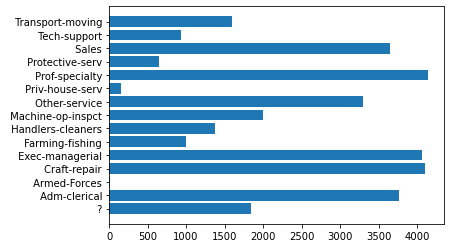

In [52]:
# 14. Plot the values on a bar chart. 
plt.barh(y=stats.index,width=stats['count'])

In [65]:
# 15. Merge the data using common keys.
df1 = adult_income_data[['sex','age','education']].sample(n=100,replace=True, random_state=10)
df2 = adult_income_data[['sex','hours-per-week']].sample(n=100,replace=True, random_state=20)
Merged = pd.merge(df1,df2,on='sex',how='inner').drop_duplicates()
Merged

,sex,age,education,hours-per-week
0,Male,19,HS-grad,40
1,Male,19,HS-grad,60
6,Male,19,HS-grad,45
10,Male,19,HS-grad,27
12,Male,19,HS-grad,50
...,...,...,...,...
5399,Female,38,Bachelors,25
5402,Female,38,Bachelors,72
5407,Female,38,Bachelors,38
5414,Female,38,Bachelors,70
